In [62]:
# initial set up

import numpy as np
import pandas as pd

np.random.seed(42)
N, T = 1000, 252
mu, sigma = 0.08, 0.2
S0 = 100

Z = np.random.standard_normal((T, N))
dt = 1/252
S = np.zeros_like(Z)
S[0] = S0

for t in range(1, T):
    S[t] = S[t-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z[t])



In [152]:
# computing empirical drift and volatility

r = np.log(S[1:]/ S[:-1])
np.size(r) # size 1000 , OKAY
np.shape(S) # size (252, 1000) , OKAY

daily_mean = r.mean()
daily_std = r.std()
mu_annual = 252 * daily_mean
vol_annual = np.sqrt(252) * daily_std

metrics = pd.DataFrame({
    'Mean (daily)': [daily_mean.mean()],
    'Std (daily)': [daily_std.mean()],
    'Drift (annual)': [mu_annual.mean()],
    'Volatility (annual)': [vol_annual.mean()]
})
metrics

,Mean (daily),Std (daily),Drift (annual),Volatility (annual)
0,0.000238,0.012601,0.059995,0.200036


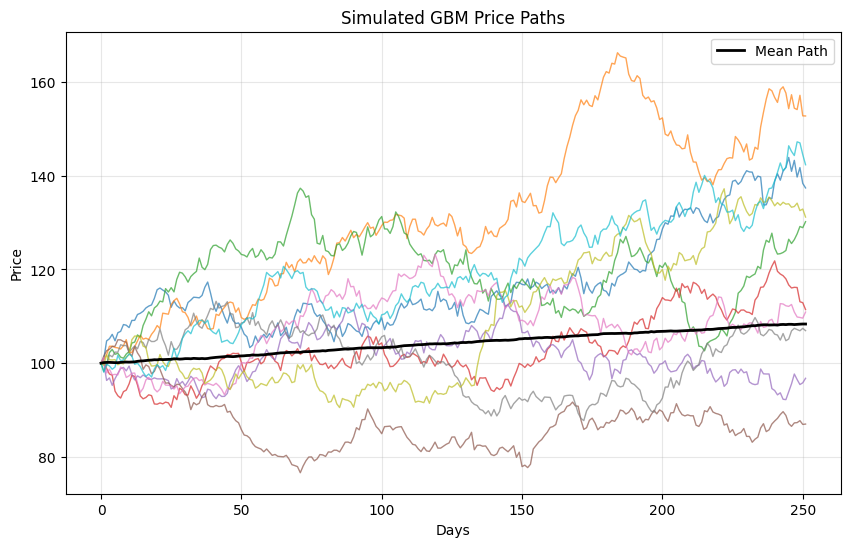

In [148]:
import matplotlib.pyplot as plt

sample_paths = S[:, np.random.choice(N, 10, replace = False)]
plt.figure(figsize=(10, 6));
plt.plot(sample_paths, lw = 1, alpha = 0.7);
plt.plot(S.mean(axis = 1), color = 'black', lw = 2, label = 'Mean Path');
plt.title('Simulated GBM Price Paths');
plt.xlabel('Days');
plt.ylabel('Price');
plt.legend();
plt.grid(True, alpha = 0.3);
plt.show();

In [ ]:
# for final markdown

theoretical_annual_drift = 0.08
drift_diff = abs(theoretical_annual_drift - mu_annual)
drift_diff

theoretical_annual_vol = 0.20
vol_diff = abs(theoretical_annual_vol - vol_annual)
vol_diff

theoretical = pd.Series({'drift':theoretical_annual_drift, 'volatility':theoretical_annual_vol});
actual = pd.Series({'drift':mu_annual, 'volatility': vol_annual});
data = pd.DataFrame({'theoretical': theoretical, 'actual': actual});
data['|diff|'] = abs(theoretical - actual);
data

,theoretical,actual,|diff|
drift,0.08,-0.031351,0.111351
volatility,0.20,0.199289,0.000711


“This exercise demonstrates how simulated stochastic returns can reproduce expected drift and volatility over large ensembles. The mild deviation between empirical and theoretical moments reflects sampling noise inherent to Monte Carlo simulation. The close alignment in volatility indicates that the model successfully captures dispersion, while the slightly lower realised drift suggests minor estimation bias due to randomness.”